## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [ ]:
# Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.

import numpy as np

def lanci_moneta(n):
    # Simula i lanci: 1 = testa, 0 = croce
    lanci = np.random.choice([1, 0], size=n)
    
    # Calcola la frequenza percentuale di teste
    frequenza_teste = (np.sum(lanci) / n) * 100
    
    return frequenza_teste

In [5]:
#Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.

def frequenze_testa_variabili():
    # 100 grandezze di campione da 10 a 20000
    dimensioni_campione = np.linspace(10, 20000, 100, dtype=int)
    
    # Lista per salvare le frequenze percentuali
    frequenze = []

    for n in dimensioni_campione:
        lanci = np.random.choice([1, 0], size=n)
        frequenza_teste = (np.sum(lanci) / n) * 100
        frequenze.append(frequenza_teste)
    
    return frequenze

In [7]:
#Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
import matplotlib.pyplot as plt

def plot_numero_medio_teste():
    # Genera 100 valori di grandezza del campione da 10 a 20000
    dimensioni_campione = np.linspace(10, 20000, 100, dtype=int)
    medie_teste = []

    for n in dimensioni_campione:
        lanci = np.random.choice([1, 0], size=n)
        numero_medio_teste = np.sum(lanci)
        medie_teste.append(numero_medio_teste)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(dimensioni_campione, medie_teste, marker='o', linestyle='-', color='blue')
    plt.title("Numero medio di teste rispetto alla grandezza del campione")
    plt.xlabel("Grandezza del campione (numero di lanci)")
    plt.ylabel("Numero medio di teste")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [8]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Quante righe e colonne ha il dataset?

print("Shape del dataset:", df.shape)

Shape del dataset: (891, 12)


In [11]:
#Controlla quanti valori mancanti ci sono per colonna
print("Valori mancanti per colonna:")
print(df.isnull().sum())

Valori mancanti per colonna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [14]:
#Rimuovi le righe dove il valore di 'Age' è mancante
df = df.dropna(subset=['Age'])

In [15]:
#Controlla se ci sono righe duplicate
print("Numero di righe duplicate:", df.duplicated().sum())

Numero di righe duplicate: 0


In [18]:
#Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
def età_media_per_classe(df):
    # Calcola l'età media per ogni classe
    età_media = df.groupby('Pclass')['Age'].mean()
    
    # Riempi i valori mancanti di 'Age' con il valore medio per la rispettiva classe
    for pclass in df['Pclass'].unique():
        df.loc[(df['Pclass'] == pclass) & (df['Age'].isnull()), 'Age'] = età_media[pclass]
    
    return df

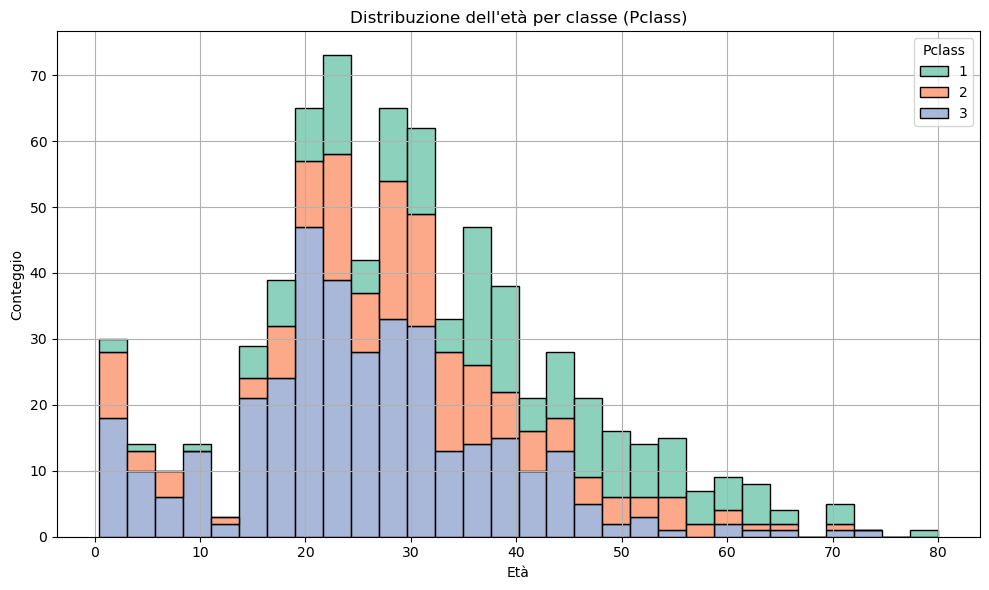

In [19]:
#Visualizza la distribuzione dell'età per classe
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', bins=30, palette='Set2')
plt.title("Distribuzione dell'età per classe (Pclass)")
plt.xlabel("Età")
plt.ylabel("Conteggio")
plt.grid(True)
plt.tight_layout()
plt.show()


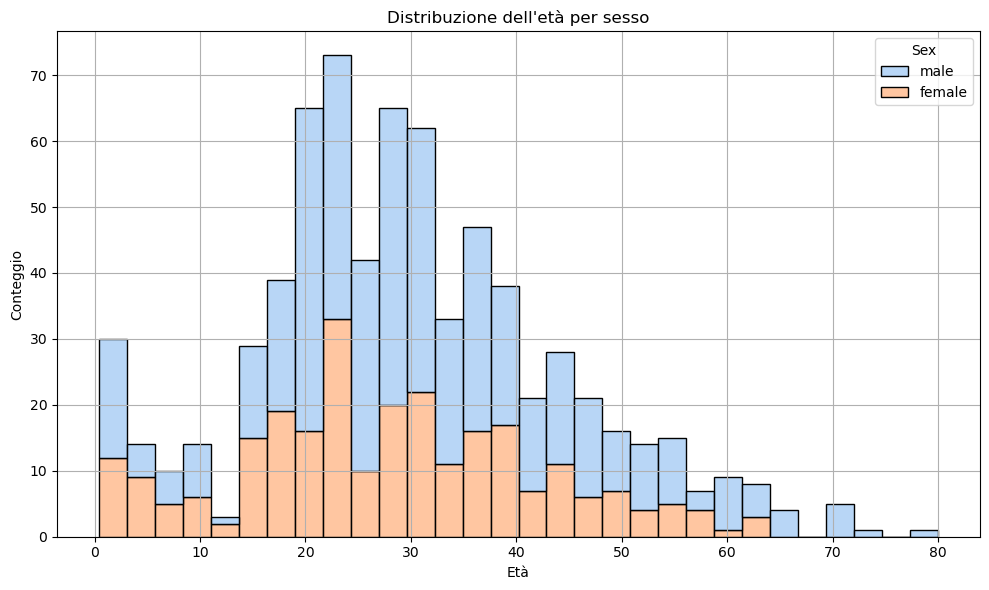

In [22]:
# Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30, palette='pastel')
plt.title("Distribuzione dell'età per sesso")
plt.xlabel("Età")
plt.ylabel("Conteggio")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
#- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
print("Distribuzione delle specie:")
print(df['species'].value_counts()) 

Distribuzione delle specie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [25]:
# Calcola la lunghezza e la larghezza media dei petali per specie
media_petali = df.groupby('species')[['petal_length', 'petal_width']].mean()
print("Lunghezza e larghezza media dei petali per specie:")
print(media_petali)

Lunghezza e larghezza media dei petali per specie:
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


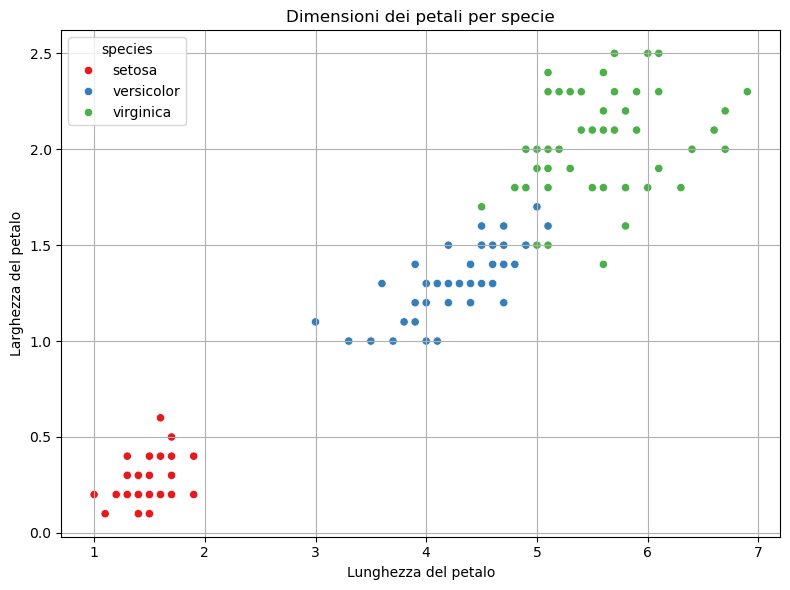

In [26]:
#Visualizza le dimensioni dei petali per specie (scatterplot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1')
plt.title("Dimensioni dei petali per specie")
plt.xlabel("Lunghezza del petalo")
plt.ylabel("Larghezza del petalo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Crea una nuova colonna per l'area del petalo e analizzala
# Area = lunghezza * larghezza
df['petal_area'] = df['petal_length'] * df['petal_width']

# Statistiche descrittive dell'area del petalo per specie
area_media = df.groupby('species')['petal_area'].mean()
print("Area media del petalo per specie:")
print(area_media)

Area media del petalo per specie:
species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64


C:\Users\abdo\AppData\Local\Temp\ipykernel_11848\932413528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='petal_area', palette='pastel')


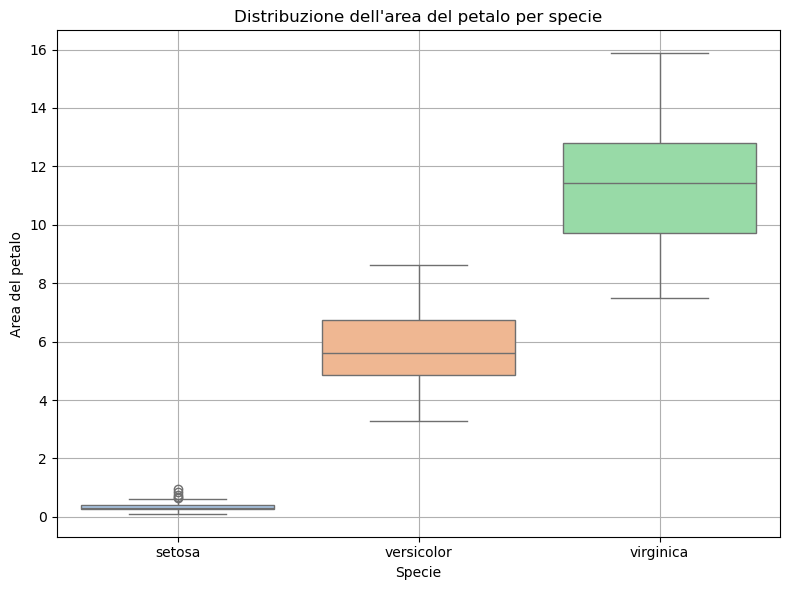

In [32]:
#Grafico della distribuzione dell’area del petalo per specie (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='petal_area', palette='pastel')
plt.title("Distribuzione dell'area del petalo per specie")
plt.xlabel("Specie")
plt.ylabel("Area del petalo")
plt.grid(True)
plt.tight_layout()
plt.show()